# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C

### 1.2 ランダムなデータを使う場合

In [38]:
C={}
n=100
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

## 2. distanceとgraph_of_tourの定義

In [39]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [ ]:
import time

# start = random.randint(0,n)

def decide_u(v, visited, G):
    max = 10**8
    d = []
    for u in G[v]:
        if u not in visited:
            d.append(G[v][u]["weight"])
        else:
            d.append(max)
    # index合わせるために現在いる都市にマックスを追加
    d.insert(v, max)
    sort_d = sorted(d)[:3]
    choice = sort_d[random.randint(0,2)]
    u = d.index(choice)
    return u

def random_neighbor(G):
    start = 0
    tour = [start]
    visited = {start:True}
    while len(tour) < len(C):
        v = tour[-1]
        random_min_u = decide_u(v, visited, G)
        if random_min_u not in visited:
            visited[random_min_u] = True
            tour.append(random_min_u)
    return tour

def better_solution(sol):
    n = len(sol) #都市の数
    # print(sol)
    #反転させる
    for i in range(n):
        for length in range(2, n):
            #一番最後はいらないので削除
            if i+length-1 > n-1:
                break
            path = sol[i:i+length] #reverseしたいpath
            diff = -distance(C[sol[i-1]], C[sol[i]]) - distance(C[sol[i+length-1]], C[sol[(i+length)%n]])+distance(C[sol[i-1]], C[sol[i+length-1]])+ distance(C[sol[i]], C[sol[(i+length)%n]])
            if diff < -0.0000001: #数値誤差の関係で0ではない
                path.reverse()
                bsol = sol[:i] + path + sol[i+length:]
                return bsol
    return None

def local_search(init_sol):
    sol = init_sol #現在の解を表す
    #近傍を見て改善解があれば改善する
    while True:
        bsol = better_solution(sol) #改善する
        if bsol == None:
            return sol
        else:
            sol = bsol

    return None

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''
    pre_tour = [i for i in C]

    #全結合のグラフ
    G = nx.Graph()
    for v in C:
        G.add_node(v)
    for i, ci in enumerate(C):
        for j, cj in enumerate(C):
            if i < j:
                G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))

    min_tour_size = graph_of_tour(pre_tour).size(weight="weight")
    ans_tour = pre_tour
    starttime=time.time()
    while time.time() - starttime < timelimit:
        tour = random_neighbor(G)
        ans_tour = local_search(tour)
        if graph_of_tour(ans_tour).size(weight="weight") < min_tour_size:
            min_tour_size = graph_of_tour(ans_tour).size(weight="weight")
            print("min_tour_size:,",min_tour_size, ans_tour)
    return ans_tour

tour=tsp_solve(C,500)

min_tour_size:, 87844.30381353416 [79, 47, 43, 37, 18, 30, 42, 60, 24, 56, 95, 16, 54, 77, 53, 82, 83, 0, 81, 93, 19, 50, 74, 89, 4, 67, 76, 78, 38, 51, 85, 1, 61, 65, 23, 59, 35, 96, 21, 90, 6, 11, 48, 71, 13, 41, 88, 17, 87, 25, 68, 5, 97, 40, 70, 20, 44, 72, 7, 55, 99, 66, 64, 75, 80, 2, 98, 27, 15, 94, 3, 10, 57, 14, 33, 22, 8, 92, 9, 46, 86, 49, 58, 45, 36, 84, 91, 62, 39, 28, 12, 34, 29, 52, 26, 32, 69, 63, 31, 73]
min_tour_size:, 84062.64977386183 [56, 24, 73, 31, 69, 32, 63, 26, 52, 29, 34, 12, 28, 91, 62, 39, 98, 2, 80, 75, 27, 15, 94, 3, 66, 64, 99, 55, 7, 8, 72, 88, 17, 87, 41, 13, 71, 48, 11, 90, 6, 68, 25, 44, 92, 9, 22, 33, 14, 57, 10, 84, 36, 45, 58, 49, 43, 47, 79, 37, 18, 30, 60, 42, 16, 0, 81, 83, 82, 93, 38, 51, 70, 86, 46, 20, 40, 5, 97, 65, 21, 96, 23, 35, 59, 1, 61, 85, 78, 76, 67, 4, 89, 74, 19, 50, 53, 77, 54, 95]
min_tour_size:, 83964.2055678191 [89, 74, 50, 19, 82, 53, 77, 95, 56, 54, 16, 42, 60, 30, 83, 0, 81, 38, 51, 70, 18, 37, 43, 47, 79, 24, 73, 31, 63, 6

KeyboardInterrupt: ignored

## 4. 解tourの描画と実行可能性

size of tour: 84316.32317685429
feasibility: True


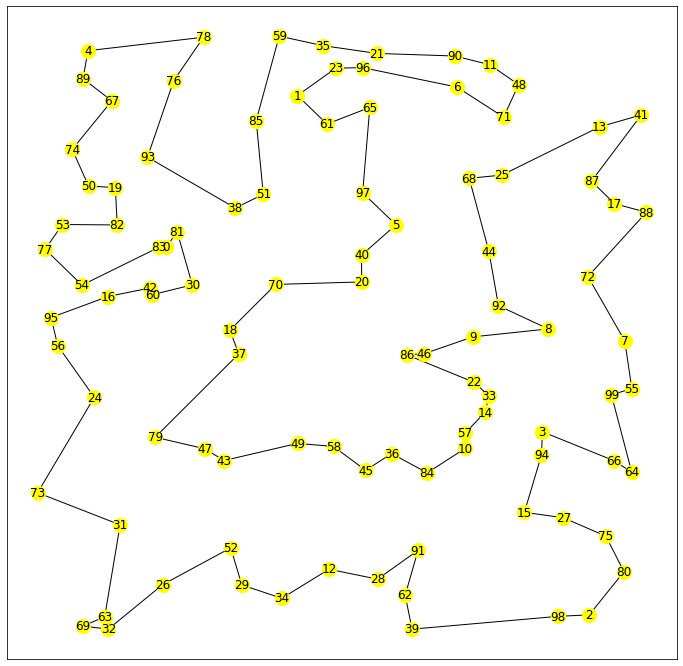

In [51]:
Gt=graph_of_tour(tour)
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 